In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [37]:
np.arange(2010, 2011)

array([2010])

In [2]:
state = 'MG'

In [3]:
data = pd.read_csv('./data/dengue.csv.gz')

data = data.loc[data.uf == state]

data.date = pd.to_datetime(data.date)

data.set_index('date',inplace = True)

data = data[['casos']].resample('W-SUN').sum()

data.head()

,casos
date,
2010-01-03,2794
2010-01-10,3729
2010-01-17,4656
2010-01-24,6195
2010-01-31,7179


In [4]:
year = 2023

In [9]:
df_preds1 = pd.read_csv(f'./predictions/preds_{state}_{year}_lstm.csv')

df_preds1.dates = pd.to_datetime(df_preds1.dates)

df_preds1.head()

,dates,lower,preds,upper,adm_1,adm_0,adm_2
0,2022-10-09,0.0,0.0,0.0,MG,BR,NaN
1,2022-10-16,0.0,0.0,0.0,MG,BR,NaN
2,2022-10-23,0.0,0.0,0.0,MG,BR,NaN
3,2022-10-30,0.0,0.0,0.0,MG,BR,NaN
4,2022-11-06,0.0,0.0,0.0,MG,BR,NaN


In [11]:
df_preds2 = pd.read_csv(f'./predictions/preds_{state}_{year}_bi_lstm.csv')

df_preds2.dates = pd.to_datetime(df_preds2.dates)

df_preds2.head()

,dates,lower,preds,upper,adm_1,adm_0,adm_2
0,2022-10-09,0.000000,0.000000,0.000000,MG,BR,NaN
1,2022-10-16,0.000000,0.000000,0.000000,MG,BR,NaN
2,2022-10-23,0.000000,0.000000,0.000000,MG,BR,NaN
3,2022-10-30,0.000000,0.000000,0.000000,MG,BR,NaN
4,2022-11-06,454.525058,503.843255,617.854911,MG,BR,NaN


In [33]:
df_preds3 = pd.read_csv(f'./predictions/preds_{state}_{year}_baseline.csv')

df_preds3.dates = pd.to_datetime(df_preds3.dates)

df_preds3.head()

,dates,lower,preds,upper,adm_1,adm_0,adm_2
0,2022-10-09,0.0,0.0,0.0,MG,BR,NaN
1,2022-10-16,0.0,0.0,0.0,MG,BR,NaN
2,2022-10-23,0.0,0.0,0.0,MG,BR,NaN
3,2022-10-30,0.0,0.0,0.0,MG,BR,NaN
4,2022-11-06,0.0,0.0,0.0,MG,BR,NaN


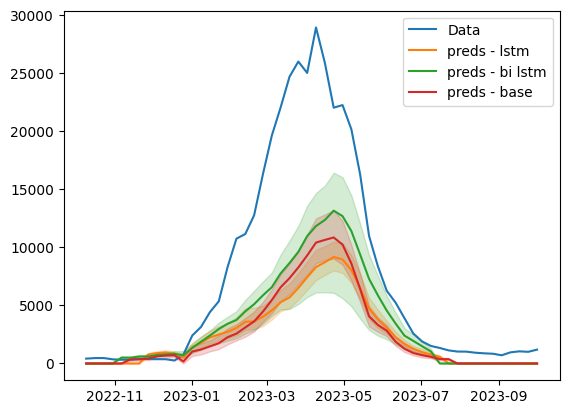

In [34]:
fig, ax = plt.subplots()

df_w = data.loc[data.index.isin(df_preds.dates)]

ax.plot(df_w.casos, label = 'Data')

ax.plot(df_preds1.dates, df_preds1.preds, label = 'preds - lstm', color = 'tab:orange')

ax.fill_between( df_preds1.dates, df_preds1.lower, df_preds1.upper, color = 'tab:orange', alpha = 0.2)

ax.plot(df_preds2.dates, df_preds2.preds, label = 'preds - bi lstm', color = 'tab:green')

ax.fill_between( df_preds2.dates, df_preds2.lower, df_preds2.upper, color = 'tab:green', alpha = 0.2)

ax.plot(df_preds3.dates, df_preds3.preds, label = 'preds - base', color = 'tab:red')

ax.fill_between( df_preds3.dates, df_preds3.lower, df_preds3.upper, color = 'tab:red', alpha = 0.2)

ax.legend()
#ax.set_title(f'MG - {YEAR}')

plt.show()

In [35]:
from keras.models import load_model

In [36]:
model_name = 'baseline'

model = load_model(f'./saved_models/model_MG_2022_{model_name}.keras')

print(model.summary())

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (4, 52, 5)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (4, 52, 64)            │        17,920 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (4, 52, 64)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (4, 64)                │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (4, 64)                │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (4, 52)                │         3,380 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 162,974 (636.62 KB)

 Trainable params: 54,324 (212.20 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 108,650 (424.42 KB)

None
